# Heart Disease Predisciton


This notebook includes whole project's processes. Firstly i will analyze our data in terms of empty rows and columns, distributions and correlations. Next, i will deploy some model in this dataset to predict heart disease.


### Content

This database contains 13 attributes and a target variable. It has 8 nominal values and 5 numeric values. The detailed description of all these features are as follows:

Age: Patients Age in years (Numeric)

Sex: Gender (Male : 1; Female : 0) (Nominal)

cp: Type of chest pain experienced by patient. This term categorized into 4 category.
0 typical angina, 1 atypical angina, 2 non- anginal pain, 3 asymptomatic (Nominal)

trestbps: patient's level of blood pressure at resting mode in mm/HG (Numerical)

chol: Serum cholesterol in mg/dl (Numeric)

fbs: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)

restecg: Result of electrocardiogram while at rest are represented in 3 distinct values
0 : Normal 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >
0.05 mV) 2: showing probable or definite left ventricular hypertrophyby Estes' criteria (Nominal)

thalach: Maximum heart rate achieved (Numeric)

exang: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)

oldpeak: Exercise induced ST-depression in relative with the state of rest (Numeric)

slope: ST segment measured in terms of slope during peak exercise
0: up sloping; 1: flat; 2: down sloping(Nominal)

ca: The number of major vessels (0–3)(nominal)

thal: A blood disorder called thalassemia
0: NULL 1: normal blood flow 2: fixed defect (no blood flow in some part of the heart) 3: reversible defect (a blood flow is observed but it is not normal(nominal)

target: It is the target variable which we have to predict 1 means patient is suffering from heart disease and 0 means patient is normal.

## Importing Libraries


In [254]:
#for data manipulation

import pandas as pd
import numpy as np

#for plotting

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#for machine learning models

from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier, VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split ,cross_val_score , GridSearchCV,RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

#for preprocessing 
from sklearn.preprocessing import MinMaxScaler

sns.set(style="darkgrid")

In [255]:
heart_data = pd.read_csv("../project/Heart_disease_cleveland_new.csv")

df = heart_data.copy()

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [256]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [257]:
df.isnull().sum().to_frame() #to see if data has any null columns

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [258]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


In [259]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# Exploratory Data Analysis (EDA)

## Target variable distribution in the dataset

<Axes: xlabel='target', ylabel='count'>

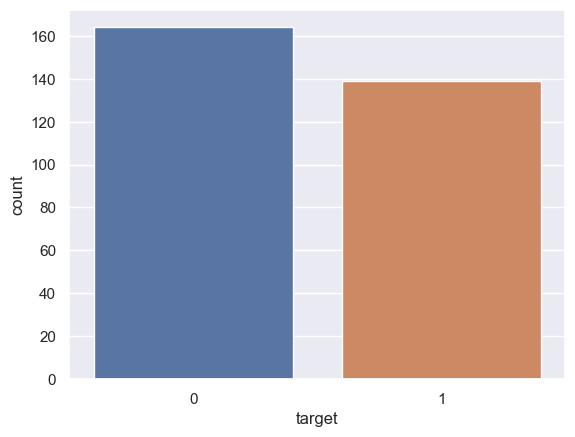

In [260]:
sns.countplot(data=df,x="target") #in this dataset there is no target value dominance like in e-mail
                                #fraud detection which only few samples are "fraud"

## Age & Target 

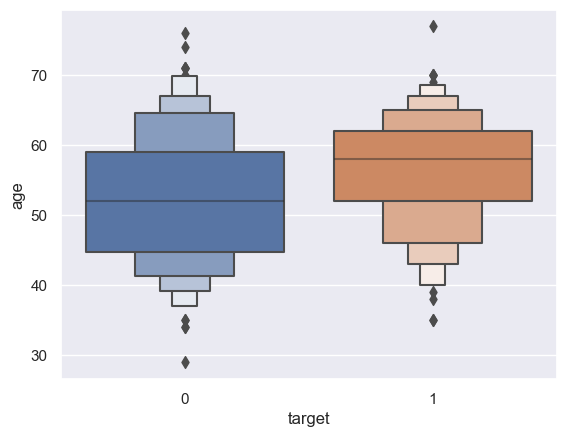

In [261]:
sns.boxenplot(y=df["age"],x= df["target"])  #this, repsresents the desnisty of the target vs the age values in heart dataset.
plt.show()  #black squares are the outliers. i will take care of them in the next sections.

we can see that age is highly correlated to the heart attack or disease. but, we can not say that age causes the heart attacks. we can only say it is highly likely for a person to have heart attack due to their age.

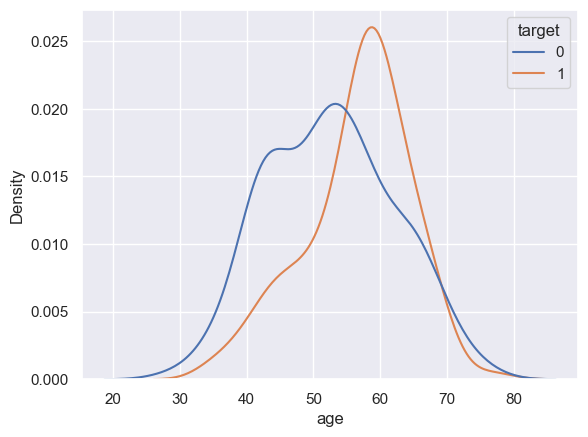

In [262]:
sns.kdeplot(x=df["age"],hue=df["target"])  #using seaborn's kdeplot to see it better
plt.show()


## Sex & Target

<Axes: xlabel='sex', ylabel='target'>

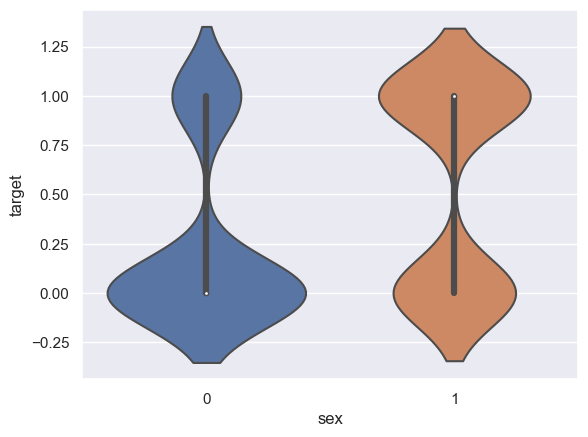

In [263]:
sns.violinplot(data=df,x="sex",y="target") #this plot shows us males are having more heart attacks than women. or this might be 'cause of the male
# data is more than women in the dataset.

<Axes: xlabel='sex', ylabel='count'>

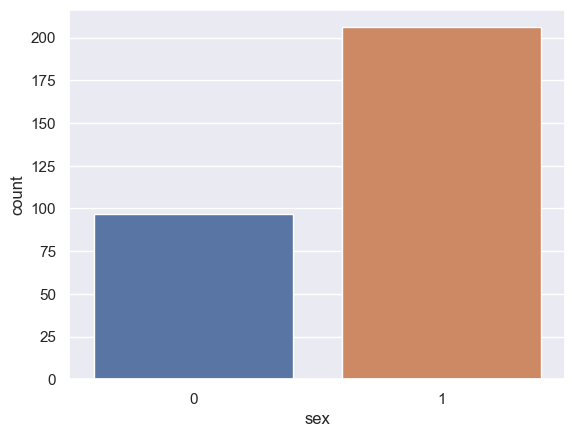

In [264]:
sns.countplot(data=df,x="sex") # as i thought, male data is more than women.

## Tresbps & Target

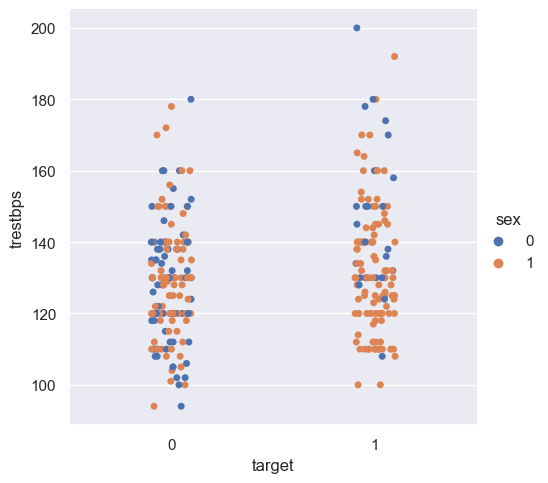

In [265]:
sns.catplot(data=df,x="target",y="trestbps",hue="sex") #trestbps doesn't seem like a goed estimator beacuse for the same values there is a same probabilty for
#heart attack

## Heatmap

<Axes: >

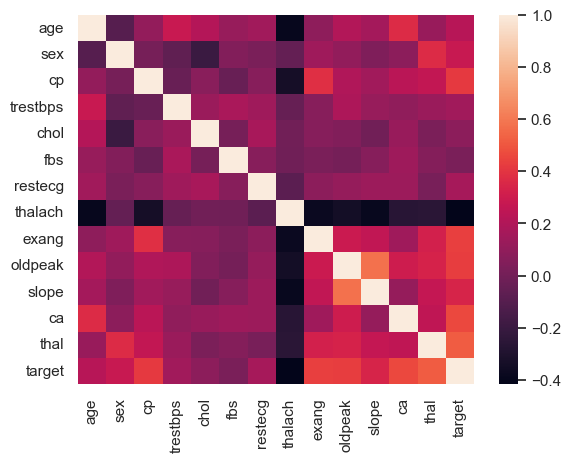

In [266]:
sns.heatmap(data=df.corr()) #thalach variable looks weird in terms of correlation we might need to look at this column carefully

## thalach distribution & sex

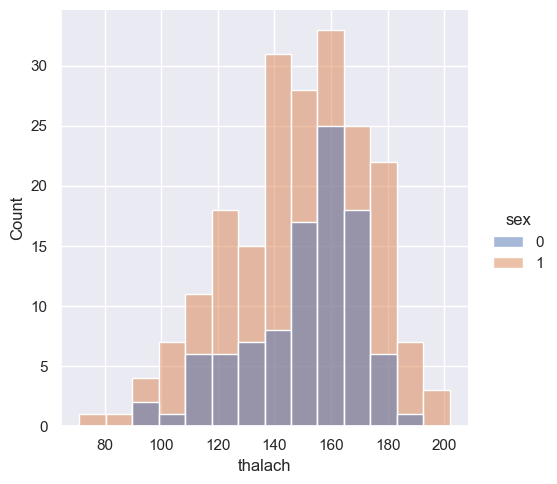

In [267]:
sns.displot(data=df,x="thalach",hue="sex") #around value 125- women distribution changes while men stays like a normal distibution.

## cp & target

<Axes: xlabel='target', ylabel='count'>

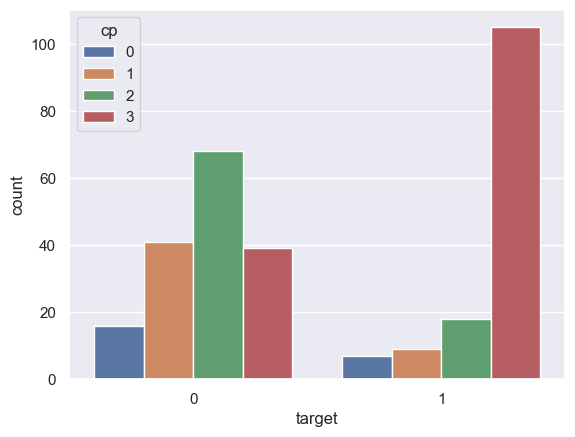

In [268]:
sns.countplot(data=df,x="target",hue="cp") #for cp=3 person is more likely to have a heart attack. and for cp=2 must be the optimal value for a healthy individual.

## rest of the nominal columns and the target column

In [269]:
#cardinality of the nominal columns
nominals=["fbs","restecg","exang","slope","ca","thal"]
df[nominals].nunique()

fbs        2
restecg    3
exang      2
slope      3
ca         4
thal       3
dtype: int64

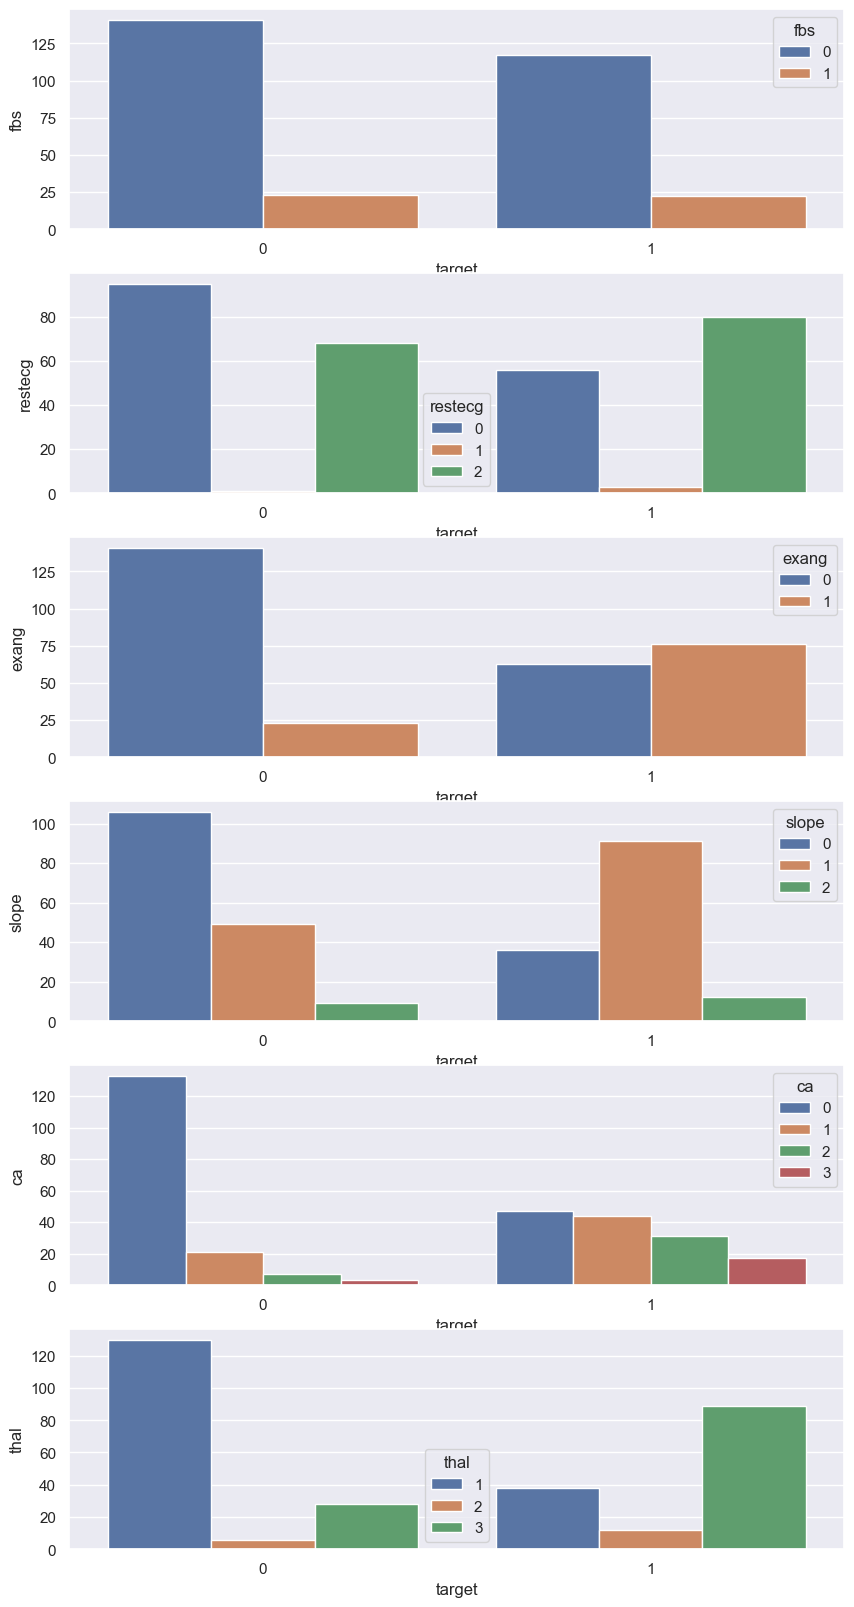

In [270]:
nominals=["fbs","restecg","exang","slope","ca","thal"]

fig, axs = plt.subplots(6,1 ,figsize=(10,20))

for nominal,k in zip(nominals,range(6)):
    sns.countplot(
        data=df,
        hue=nominal,
        x="target",
        ax = axs[k])
    axs[k].set_ylabel(nominal)

    
plt.show()

# Data Preprocessing

In [271]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [272]:
#defining an outlier removal function to remove outliers
def remove_outlier_per_column(df,x):
    Q1= x.quantile(0.25)
    Q3 = x.quantile(0.75)

    IQR = Q3 -Q1 #interquartile range

    df = df.loc[(x>=Q1-1.5*IQR) & (x<=Q3+1.5*IQR)]
    return df
#only removing outliers from continious data
nominals=["fbs","restecg","exang","slope","ca","thal","sex","target","cp"]

cont = [column for column in df.columns if column not in nominals] #continious columns

display(df[cont])


,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,67,160,286,108,1.5
2,67,120,229,129,2.6
3,37,130,250,187,3.5
4,41,130,204,172,1.4
...,...,...,...,...,...
298,45,110,264,132,1.2
299,68,144,193,141,3.4
300,57,130,131,115,1.2
301,57,130,236,174,0.0


In [273]:
for column in cont:
     df = remove_outlier_per_column(df,df[column])



In [274]:
df #checking how many rows have left after removing outliers from data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1


In [275]:
df.info() #as we can see dataset has no object type column. to encoode nominal columns, it's better to change their data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       284 non-null    int64  
 1   sex       284 non-null    int64  
 2   cp        284 non-null    int64  
 3   trestbps  284 non-null    int64  
 4   chol      284 non-null    int64  
 5   fbs       284 non-null    int64  
 6   restecg   284 non-null    int64  
 7   thalach   284 non-null    int64  
 8   exang     284 non-null    int64  
 9   oldpeak   284 non-null    float64
 10  slope     284 non-null    int64  
 11  ca        284 non-null    int64  
 12  thal      284 non-null    int64  
 13  target    284 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [276]:
for nominal in nominals:
    df[nominal] = df[nominal].astype("object")

In [277]:
df["target"] = df["target"].astype("uint8")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       284 non-null    int64  
 1   sex       284 non-null    object 
 2   cp        284 non-null    object 
 3   trestbps  284 non-null    int64  
 4   chol      284 non-null    int64  
 5   fbs       284 non-null    object 
 6   restecg   284 non-null    object 
 7   thalach   284 non-null    int64  
 8   exang     284 non-null    object 
 9   oldpeak   284 non-null    float64
 10  slope     284 non-null    object 
 11  ca        284 non-null    object 
 12  thal      284 non-null    object 
 13  target    284 non-null    uint8  
dtypes: float64(1), int64(4), object(8), uint8(1)
memory usage: 31.3+ KB


## Feature Engineering(fuzz technique)

In [278]:
# #int he fuzzing techinque the ranges were important so that's why i decided to get those ranges as separate columns.
df['age_range'] = pd.cut(x=df['age'], bins=[0,20,45,60,99], labels=['Adult_1','Adult_2',"Adult_3","Adult_4"]) #i'vw seperated the age groups
# df["bps_range"] = pd.cut(x=df["trestbps"],bins=[0,120,130,140,180,200],labels=["Normal","Evelated","High","High2","Danger"])
# df["chol_range"] = pd.cut(x=df["chol"],bins=[0,200,240,600],labels=["Normal","Border","High"])
# display(df)

In [279]:
y = df.pop("target")
X = df

display(X)
display(y)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age_range
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,Adult_4
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,Adult_4
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,Adult_4
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,Adult_2
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,Adult_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,Adult_2
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,Adult_4
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,Adult_3
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,Adult_3


0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: target, Length: 284, dtype: uint8

## Encoding & Scaling


In [280]:
X = pd.get_dummies(X) 
display(X)

/var/folders/bl/r2644t156ysdhnf63_n5zlbr0000gn/T/ipykernel_2879/3001392379.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(X)
/var/folders/bl/r2644t156ysdhnf63_n5zlbr0000gn/T/ipykernel_2879/3001392379.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(X)
/var/folders/bl/r2644t156ysdhnf63_n5zlbr0000gn/T/ipykernel_2879/3001392379.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(X)
/var/folders/bl/r2644t156ysdhnf63_n5zlbr0000gn/T/ipykernel_2879/3001392379.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X 

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3,age_range_Adult_1,age_range_Adult_2,age_range_Adult_3,age_range_Adult_4
0,63,145,233,150,2.3,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,67,160,286,108,1.5,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,67,120,229,129,2.6,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37,130,250,187,3.5,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,41,130,204,172,1.4,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,110,264,132,1.2,0,1,1,0,0,...,0,0,0,0,0,1,0,1,0,0
299,68,144,193,141,3.4,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
300,57,130,131,115,1.2,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
301,57,130,236,174,0.0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0


In [281]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import SparsePCA

a = SparsePCA(n_components=5).fit_transform(X)
hmm = pd.DataFrame(data=a,columns=["pca1","pca2","pca3","pca4","pca5"])
display(hmm)

X.reset_index(inplace=True)
hmm.reset_index(inplace=True)

result = pd.concat([hmm,X],axis=1,join="outer",ignore_index=True)

display(result)
scaler = StandardScaler()
X = scaler.fit_transform(result)
display(X)


,pca1,pca2,pca3,pca4,pca5
0,-9.440724,-0.007625,14.869901,-8.854901,1.187023
1,43.034520,41.590415,29.721357,-12.823651,0.734211
2,-13.401116,20.796456,-9.882555,-12.824910,2.120421
3,7.390803,-36.643527,0.016486,16.921850,2.184727
4,-38.153592,-21.789553,0.018468,12.962359,-0.119511
...,...,...,...,...,...
279,21.252192,17.819891,-19.785488,9.008012,0.477966
280,-49.044843,8.908136,13.877822,-13.812646,2.617627
281,-110.430978,34.662790,0.016476,-2.903529,0.813137
282,-6.470424,-23.757389,0.018439,-2.907338,-0.952124


,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0,-9.440724,-0.007625,14.869901,-8.854901,1.187023,0,63,145,233,...,0,0,0,0,1,0,0,0,0,1
1,1,43.034520,41.590415,29.721357,-12.823651,0.734211,1,67,160,286,...,0,0,1,1,0,0,0,0,0,1
2,2,-13.401116,20.796456,-9.882555,-12.824910,2.120421,2,67,120,229,...,0,1,0,0,0,1,0,0,0,1
3,3,7.390803,-36.643527,0.016486,16.921850,2.184727,3,37,130,250,...,0,0,0,1,0,0,0,1,0,0
4,4,-38.153592,-21.789553,0.018468,12.962359,-0.119511,4,41,130,204,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,279,21.252192,17.819891,-19.785488,9.008012,0.477966,298,45,110,264,...,0,0,0,0,0,1,0,1,0,0
280,280,-49.044843,8.908136,13.877822,-13.812646,2.617627,299,68,144,193,...,0,1,0,0,0,1,0,0,0,1
281,281,-110.430978,34.662790,0.016476,-2.903529,0.813137,300,57,130,131,...,1,0,0,0,0,1,0,0,1,0
282,282,-6.470424,-23.757389,0.018439,-2.907338,-0.952124,301,57,130,236,...,1,0,0,1,0,0,0,0,1,0


array([[-1.72596274e+00, -2.13546338e-01, -3.40397488e-04, ...,
        -5.33917478e-01, -1.06552257e+00,  1.74846872e+00],
       [-1.71376512e+00,  9.73427910e-01,  1.85680365e+00, ...,
        -5.33917478e-01, -1.06552257e+00,  1.74846872e+00],
       [-1.70156750e+00, -3.03129217e-01,  9.28457542e-01, ...,
        -5.33917478e-01, -1.06552257e+00,  1.74846872e+00],
       ...,
       [ 1.70156750e+00, -2.49791552e+00,  1.54751987e+00, ...,
        -5.33917478e-01,  9.38506634e-01, -5.71929020e-01],
       [ 1.71376512e+00, -1.46359054e-01, -1.06064836e+00, ...,
        -5.33917478e-01,  9.38506634e-01, -5.71929020e-01],
       [ 1.72596274e+00, -1.51250291e+00, -1.01685272e+00, ...,
         1.87294861e+00, -1.06552257e+00, -5.71929020e-01]])

## Splitting Dataset

In [282]:
X.shape

(284, 39)

In [283]:
y.shape

(284,)

In [284]:
x_train,x_test, y_train, y_test  = train_test_split(X,y, test_size=0.25)
display(len(x_train))
display(x_test)
display(y_train)
display(y_test)

213

array([[ 1.18926761, -1.01979662,  1.50278077, ..., -0.53391748,
        -1.06552257,  1.74846872],
       [ 0.55499155, -2.6098943 , -1.01673465, ..., -0.53391748,
         0.93850663, -0.57192902],
       [-1.50640564,  0.5255096 , -0.92852683, ..., -0.53391748,
         0.93850663, -0.57192902],
       ...,
       [ 0.39642254, -0.05677964, -1.94505381, ...,  1.87294861,
        -1.06552257, -0.57192902],
       [ 0.27444637, -0.68385691,  0.7956968 , ..., -0.53391748,
        -1.06552257,  1.74846872],
       [-0.55499155,  0.3911388 , -1.54713688, ...,  1.87294861,
        -1.06552257, -0.57192902]])

116    0
262    0
192    1
112    0
251    1
      ..
114    1
40     1
281    0
130    0
286    1
Name: target, Length: 213, dtype: uint8

257    0
202    0
19     0
238    0
12     1
      ..
5      0
93     0
186    0
174    1
100    0
Name: target, Length: 71, dtype: uint8

# Model Selection

## Base Models

Text(9, 0.8339243156199678, 'local max')

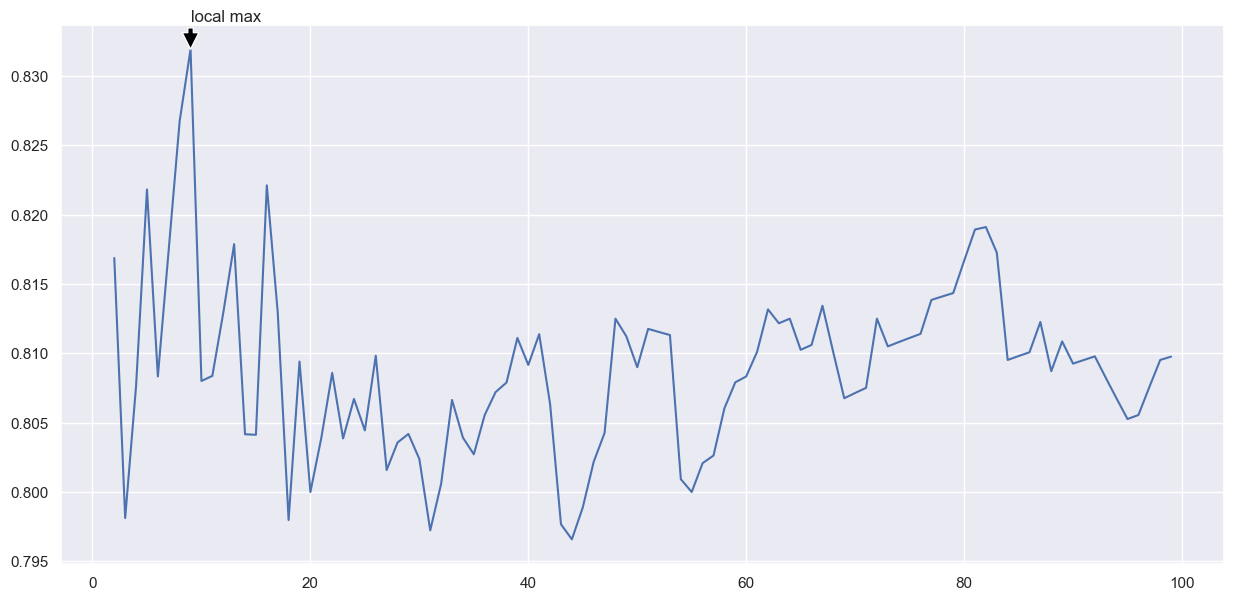

In [285]:
support_vector = SVC(random_state=6)

support_vector.fit(x_train,y_train)

from sklearn.model_selection import KFold
n_array =list()
scores = list()
for n in range(2,100): #this loop makes folds and calculates mean of the cross validation scores
    kf = KFold(n_splits=n)
    score = cross_val_score(estimator=support_vector, X=x_train,y=y_train,cv=kf,n_jobs=-1)
    score.mean()
    scores.append(score.mean())
    n_array.append(n)
fig,ax = plt.subplots(1,1,figsize=(15,7))
plot_crosss =sns.lineplot(x=n_array,y=scores,ax=ax)
cross_series = pd.Series(data=scores,index=n_array)
ax.annotate('local max', xy=(cross_series.idxmax(), cross_series.max()), xytext=(cross_series.idxmax(), cross_series.max()+0.002), arrowprops=dict(facecolor='black'),)


In [286]:
roc_auc_score(y_test,support_vector.predict(x_test)) #svc's score without hyperparameter optimization

0.8401709401709401

In [287]:
clf = BaggingClassifier(SVC()).fit(x_train,y_train)

roc_auc_score(y_test,clf.predict(x_test)) #svc's score without hyperparameter optimization

0.8209401709401709

In [288]:
import tensorflow as tf 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=64, batch_size=32)

# Evaluate model performance on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Epoch 1/64
7/7 [==============================] - 0s 911us/step - loss: 0.6817 - accuracy: 0.5399
Epoch 2/64
7/7 [==============================] - 0s 795us/step - loss: 0.6261 - accuracy: 0.7465
Epoch 3/64
7/7 [==============================] - 0s 2ms/step - loss: 0.5681 - accuracy: 0.7934
Epoch 4/64
7/7 [==============================] - 0s 1ms/step - loss: 0.5032 - accuracy: 0.8122
Epoch 5/64
7/7 [==============================] - 0s 788us/step - loss: 0.4418 - accuracy: 0.8451
Epoch 6/64
7/7 [==============================] - 0s 864us/step - loss: 0.3843 - accuracy: 0.9061
Epoch 7/64
7/7 [==============================] - 0s 772us/step - loss: 0.3377 - accuracy: 0.9155
Epoch 8/64
7/7 [==============================] - 0s 776us/step - loss: 0.2994 - accuracy: 0.9249
Epoch 9/64
7/7 [==============================] - 0s 839us/step - loss: 0.2632 - accuracy: 0.9202
Epoch 10/64
7/7 [==============================] - 0s 797us/step - loss: 0.2365 - accuracy: 0.9202
Epoch 11/64
7/7 [======

Text(96, 0.769361111111111, 'local max')

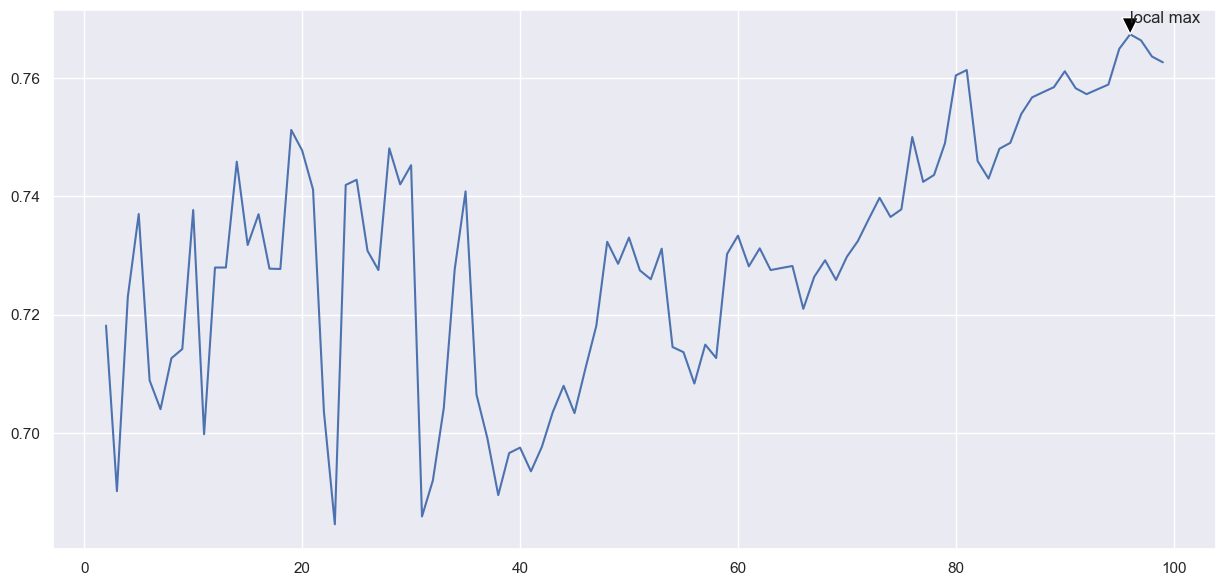

In [289]:
decision_tree = DecisionTreeClassifier(random_state=6)

decision_tree.fit(x_train,y_train)

from sklearn.model_selection import KFold
n_array =list()
scores = list()
for n in range(2,100): #this loop makes folds and calculates mean of the cross validation scores
    kf = KFold(n_splits=n)
    score = cross_val_score(estimator=decision_tree, X=x_train,y=y_train,cv=kf,n_jobs=-1)
    score.mean()
    scores.append(score.mean())
    n_array.append(n)
fig,ax = plt.subplots(1,1,figsize=(15,7))
plot_crosss =sns.lineplot(x=n_array,y=scores,ax=ax)
cross_series = pd.Series(data=scores,index=n_array)
ax.annotate('local max', xy=(cross_series.idxmax(), cross_series.max()), xytext=(cross_series.idxmax(), cross_series.max()+0.002), arrowprops=dict(facecolor='black'),)


In [290]:
roc_auc_score(y_test,decision_tree.predict(x_test)) #svc's score without hyperparameter optimization

0.7461538461538462

Text(5, 0.8331184939091916, 'local max')

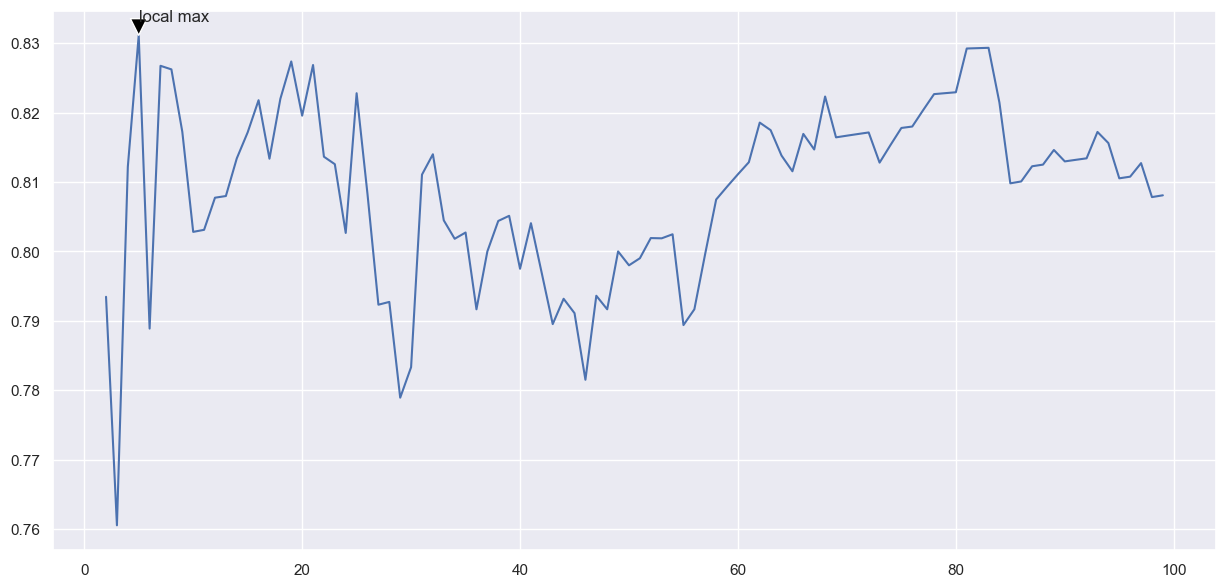

In [291]:
random_f = RandomForestClassifier(random_state=6)

random_f.fit(x_train,y_train)

from sklearn.model_selection import KFold
n_array =list()
scores = list()
for n in range(2,100): #this loop makes folds and calculates mean of the cross validation scores
    kf = KFold(n_splits=n)
    score = cross_val_score(estimator=random_f, X=x_train,y=y_train,cv=kf,n_jobs=-1)
    score.mean()
    scores.append(score.mean())
    n_array.append(n)
fig,ax = plt.subplots(1,1,figsize=(15,7))
plot_crosss =sns.lineplot(x=n_array,y=scores,ax=ax)
cross_series = pd.Series(data=scores,index=n_array)
ax.annotate('local max', xy=(cross_series.idxmax(), cross_series.max()), xytext=(cross_series.idxmax(), cross_series.max()+0.002), arrowprops=dict(facecolor='black'),)


In [292]:
roc_auc_score(y_test,random_f.predict(x_test)) #random's score without hyperparameter optimization

0.8290598290598289

Text(41, 0.8255772357723575, 'local max')

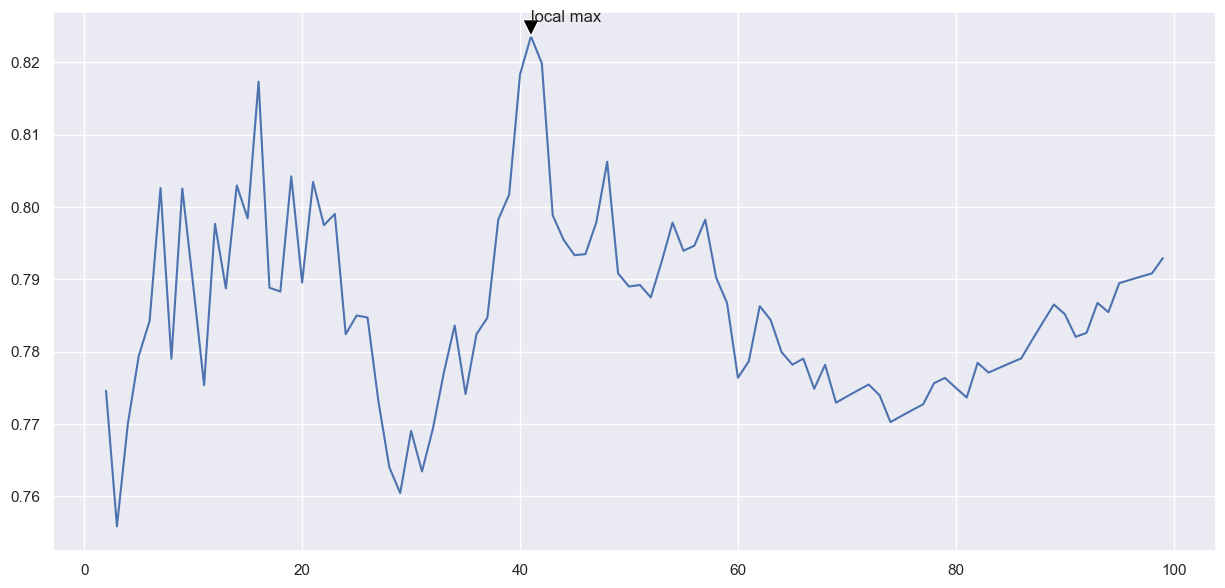

In [293]:
xgb = XGBClassifier(random_state=6)

xgb.fit(x_train,y_train)

from sklearn.model_selection import KFold
n_array =list()
scores = list()
for n in range(2,100): #this loop makes folds and calculates mean of the cross validation scores
    kf = KFold(n_splits=n)
    score = cross_val_score(estimator=xgb, X=x_train,y=y_train,cv=kf,n_jobs=-1)
    score.mean()
    scores.append(score.mean())
    n_array.append(n)
fig,ax = plt.subplots(1,1,figsize=(15,7))
plot_crosss =sns.lineplot(x=n_array,y=scores,ax=ax)
cross_series = pd.Series(data=scores,index=n_array)
ax.annotate('local max', xy=(cross_series.idxmax(), cross_series.max()), xytext=(cross_series.idxmax(), cross_series.max()+0.002), arrowprops=dict(facecolor='black'),)


In [294]:
roc_auc_score(y_test,xgb.predict(x_test)) #xgb's score without hyperparameter optimization almost 88% it is good.

0.8786324786324786

Text(7, 0.8050721966205838, 'local max')

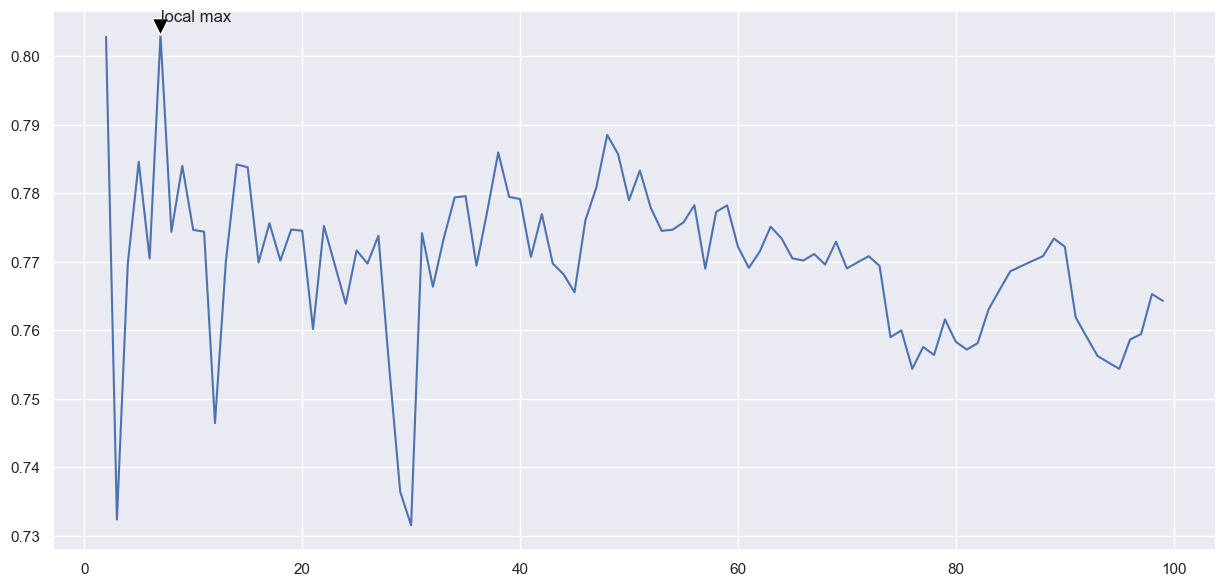

In [295]:
ada = AdaBoostClassifier(random_state=6)

ada.fit(x_train,y_train)

from sklearn.model_selection import KFold
n_array =list()
scores = list()
for n in range(2,100): #this loop makes folds and calculates mean of the cross validation scores
    kf = KFold(n_splits=n)
    score = cross_val_score(estimator=ada, X=x_train,y=y_train,cv=kf,n_jobs=-1)
    score.mean()
    scores.append(score.mean())
    n_array.append(n)
fig,ax = plt.subplots(1,1,figsize=(15,7))
plot_crosss =sns.lineplot(x=n_array,y=scores,ax=ax)
cross_series = pd.Series(data=scores,index=n_array)
ax.annotate('local max', xy=(cross_series.idxmax(), cross_series.max()), xytext=(cross_series.idxmax(), cross_series.max()+0.002), arrowprops=dict(facecolor='black'),)


In [296]:
roc_auc_score(y_test,ada.predict(x_test)) #roc_auc score without hyperparameter optimization

0.7987179487179488

Text(19, 0.8197830940988835, 'local max')

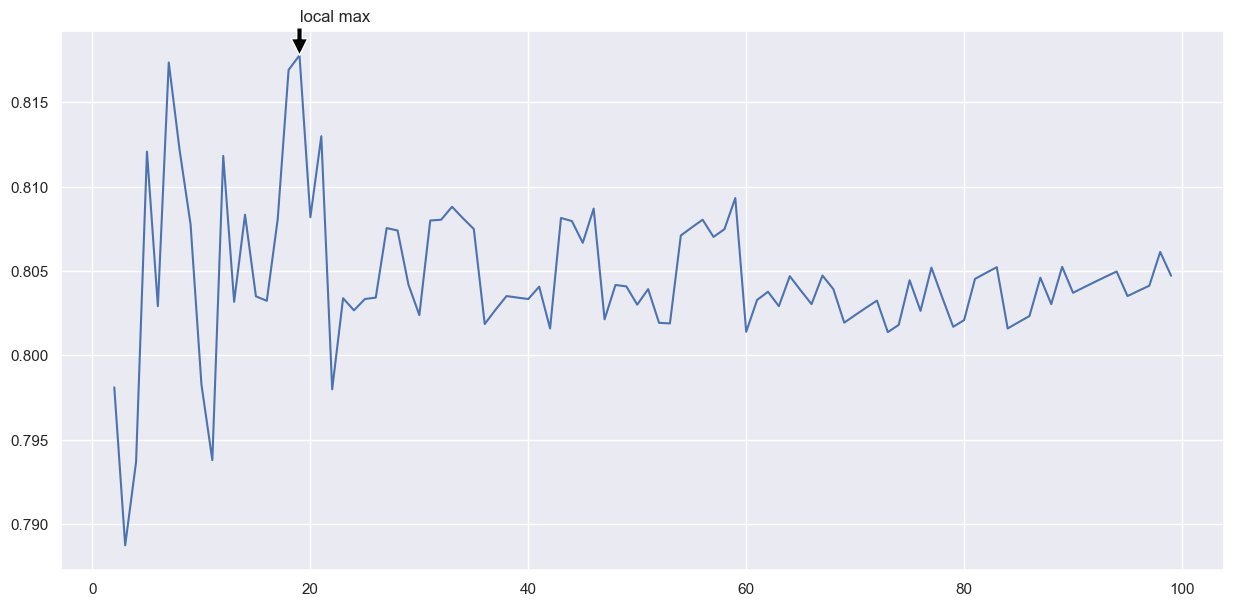

In [297]:
KNN = KNeighborsClassifier()

KNN.fit(x_train,y_train)

from sklearn.model_selection import KFold
n_array =list()
scores = list()
for n in range(2,100): #this loop makes folds and calculates mean of the cross validation scores
    kf = KFold(n_splits=n)
    score = cross_val_score(estimator=KNN, X=x_train,y=y_train,cv=kf,n_jobs=-1)
    score.mean()
    scores.append(score.mean())
    n_array.append(n)
fig,ax = plt.subplots(1,1,figsize=(15,7))
plot_crosss =sns.lineplot(x=n_array,y=scores,ax=ax)
cross_series = pd.Series(data=scores,index=n_array)
ax.annotate('local max', xy=(cross_series.idxmax(), cross_series.max()), xytext=(cross_series.idxmax(), cross_series.max()+0.002), arrowprops=dict(facecolor='black'),)


In [298]:
display(roc_auc_score(y_test,KNN.predict(x_test))) #roc_auc score without hyperparameter optimization



0.8209401709401709

In [299]:
#so far i've calculated optimal k fold for each model and scored their roc_auc scores before feature engineering and baggging and hyperparameter optimizaiton.
#the most satisfying models were svc and KNN. while others were hovering around 80% of roc_auc score.

In [300]:
from scipy.stats import uniform
param_grid = {
    'C': uniform(0.1, 10),  # Uniform distribution between 0.1 and 10
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 50))
}
svc_cv = RandomizedSearchCV(support_vector,param_distributions=param_grid, scoring = "roc_auc")
svc_cv.fit(x_train, y_train)

RandomizedSearchCV(estimator=SVC(random_state=6),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x2a7bf3050>,
                                        'gamma': ['scale', 'auto', 0.001,
                                                  0.0013257113655901094,
                                                  0.0017575106248547913,
                                                  0.002329951810515372,
                                                  0.0030888435964774815,
                                                  0.004094915062380427,
                                                  0.005428675439323859,
                                                  0.0071968567300115215,
                                                  0.00954095476349994...
                                                  0.029470517025518096,
                                                  0.03906939937054617,
                                                  0.0517947467923121,
                                                  0.06866488450043001,
                                                  0.09102981779915217,
                                                  0.1206792640639329,
                                                  0.15998587196060574,
                                                  0.21209508879201905,
                                                  0.28117686979742307,
                                                  0.3727593720314938,
                                                  0.49417133613238334,
                                                  0.655128556859551,
                                                  0.868511373751352,
                                                  1.151395399326447,
                                                  1.5264179671752334,
                                                  2.023589647725158, ...],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   scoring='roc_auc')

In [301]:
svc_cv.best_score_
display(roc_auc_score(y_test,svc_cv.predict(x_test))) #roc_auc score without hyperparameter optimization
clf = BaggingClassifier(svc_cv).fit(x_train,y_train)

display( roc_auc_score(y_test,clf.predict(x_test)))

0.8098290598290598

0.7470085470085469

In [302]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [303]:
clf = BaggingClassifier(XGBClassifier()).fit(x_train,y_train)

display( roc_auc_score(y_test,clf.predict(x_test)))

0.8482905982905982

In [304]:
from sklearn.metrics import RocCurveDisplay

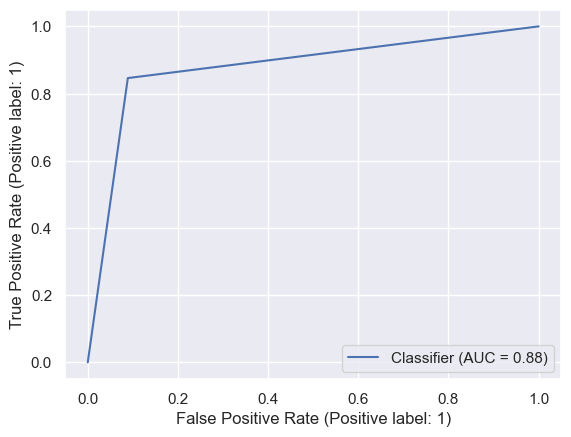

In [306]:

RocCurveDisplay.from_predictions(y_test,xgb.predict(x_test))
plt.show()

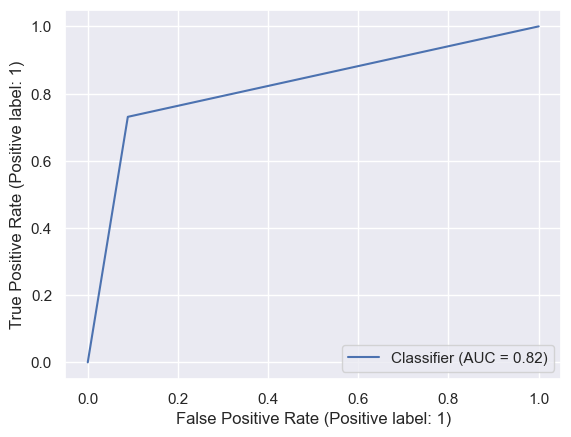

In [308]:
RocCurveDisplay.from_predictions(y_test,KNN.predict(x_test))
plt.show()

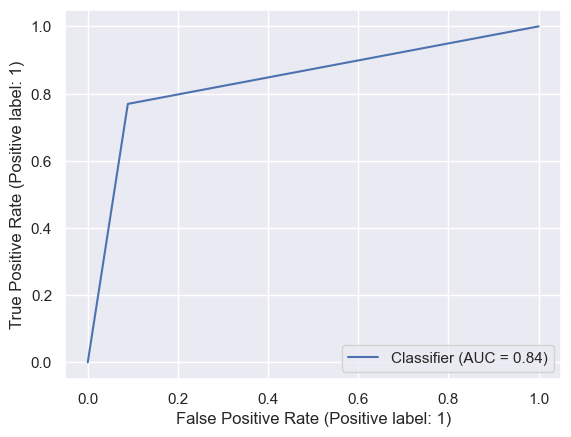

In [309]:
RocCurveDisplay.from_predictions(y_test,support_vector.predict(x_test))
plt.show()